In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base= automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [32]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Climate Analysis

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year= dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
results= []
# Perform a query to retrieve the data and precipitation scores
#all() methos adds all the result into a list 
results= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)



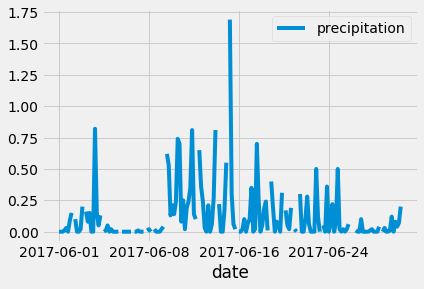

In [53]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df= df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

df.plot()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
# How many stations are available in this dataset?
#query Station dataset


session.query(func.count(Station.station)).all()

[(9)]

In [31]:
# What are the most active stations?
# List the stations and the counts in descending order.
#\ to indicte that query is continues in the next line
session.query(Measurement.station, (func.count(Measurement.station))).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [42]:
#graph with resuts

results=session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df= pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


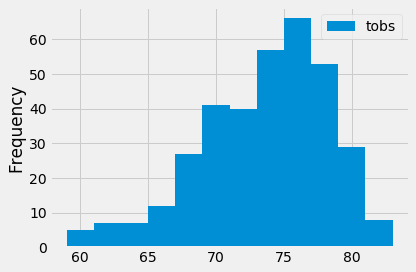

In [46]:
df.plot.hist(bins=12)
#plt.tight_layout() compress the x-axis lables ot fit into the box holding the plot
plt.tight_layout()

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [95]:
#determine key statistical analysis about June

# Design a query to retrieve June of precipitation data and plot the results. 
#Starting from the last data point in the database. 
june_start= dt.date(2017, 6, 1)
june_end = dt.date(2017, 6, 30)

# Calculate the date one year from the last date in data set.
prcp_june= []
# Perform a query to retrieve the data and precipitation scores
#all() methos adds all the result into a list 
prcp_june= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= june_start).filter(Measurement.date<= june_end).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_june_df = pd.DataFrame(prcp_june, columns=['date','precipitation'])


# Sort the dataframe by date
prcp_june_df.describe()





,precipitation
count,171.000000
mean,0.120000
std,0.217726
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,1.690000


In [94]:

tobs_june=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= june_start).filter(Measurement.date<= june_end).all()
tobs_june_df= pd.DataFrame(tobs_june, columns= ['date', 'temperature'])
tobs_june_df.sort_index()

tobs_june_df.describe()

,temperature
count,191.000000
mean,77.219895
std,2.622538
min,71.000000
25%,75.000000
50%,77.000000
75%,79.000000
max,83.000000


In [90]:
#determine key statistical analysis about June

# Design a query to retrieve June of precipitation data and plot the results. 
#Starting from the last data point in the database. 
december_start= dt.date(2016, 12, 1)
december_end = dt.date(2016, 12, 31)

# Calculate the date one year from the last date in data set.
prcp_decemeber= []
# Perform a query to retrieve the data and precipitation scores
#all() methos adds all the result into a list 
prcp_december= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= december_start).filter(Measurement.date<= december_end).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_december_df = pd.DataFrame(prcp_december, columns=['date','precipitation'])

prcp_december_df.set_index(prcp_december_df['date'], inplace=True)

# Sort the dataframe by date
prcp_december_df= prcp_december_df.sort_index()


prcp_december_df.describe()

,precipitation
count,178.000000
mean,0.199494
std,0.342967
min,0.000000
25%,0.020000
50%,0.060000
75%,0.247500
max,2.370000


In [93]:


#graph with resuts

tobs_december=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= december_start).filter(Measurement.date <= december_end).all()
tobs_december_df= pd.DataFrame(tobs_december, columns= ['date', 'temperature'])
tobs_december_df.sort_index()

tobs_december_df.describe()

,temperature
count,200.000000
mean,71.130000
std,3.419292
min,60.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,78.000000


In [107]:
month= pd.date_range(start= '2018-01', freq= 'Y', periods=5)

## Findings and Analysis

The weather in June is less variable; the mean temperature is around 77.2 and the standard deviation 2.63. Moreover, this month has a relatively small mm of precipitation as the mean in 0.12, however the median is 0.02, this indicates a skew to the right. On the other hand, we see lower temperatures in December, mean is 71.13 fahrenheit and a larger variability as the standard deviation is 3.41. There is a similar distribution with precipitations in December; the mean is 0.199 mm and the median is at 0.06 evidencing the data is skewed to the right. There are lower temperatures and greater precipitation in December; however there is not a huge difference between the two months analyzed; only about 5 degrees Fahrenheit and 0.07 mm of precipitation. In further analysis, I would recommend to explore possible associations between the precipitation and temperature with a scatter plot. Finally there are other important variables like cloudiness and humidity that could be included in the weather analysis; also comparing all the measures to zones with successful surfing shops to predict revenue based on weather conditions. 